## 原始矩阵正向化
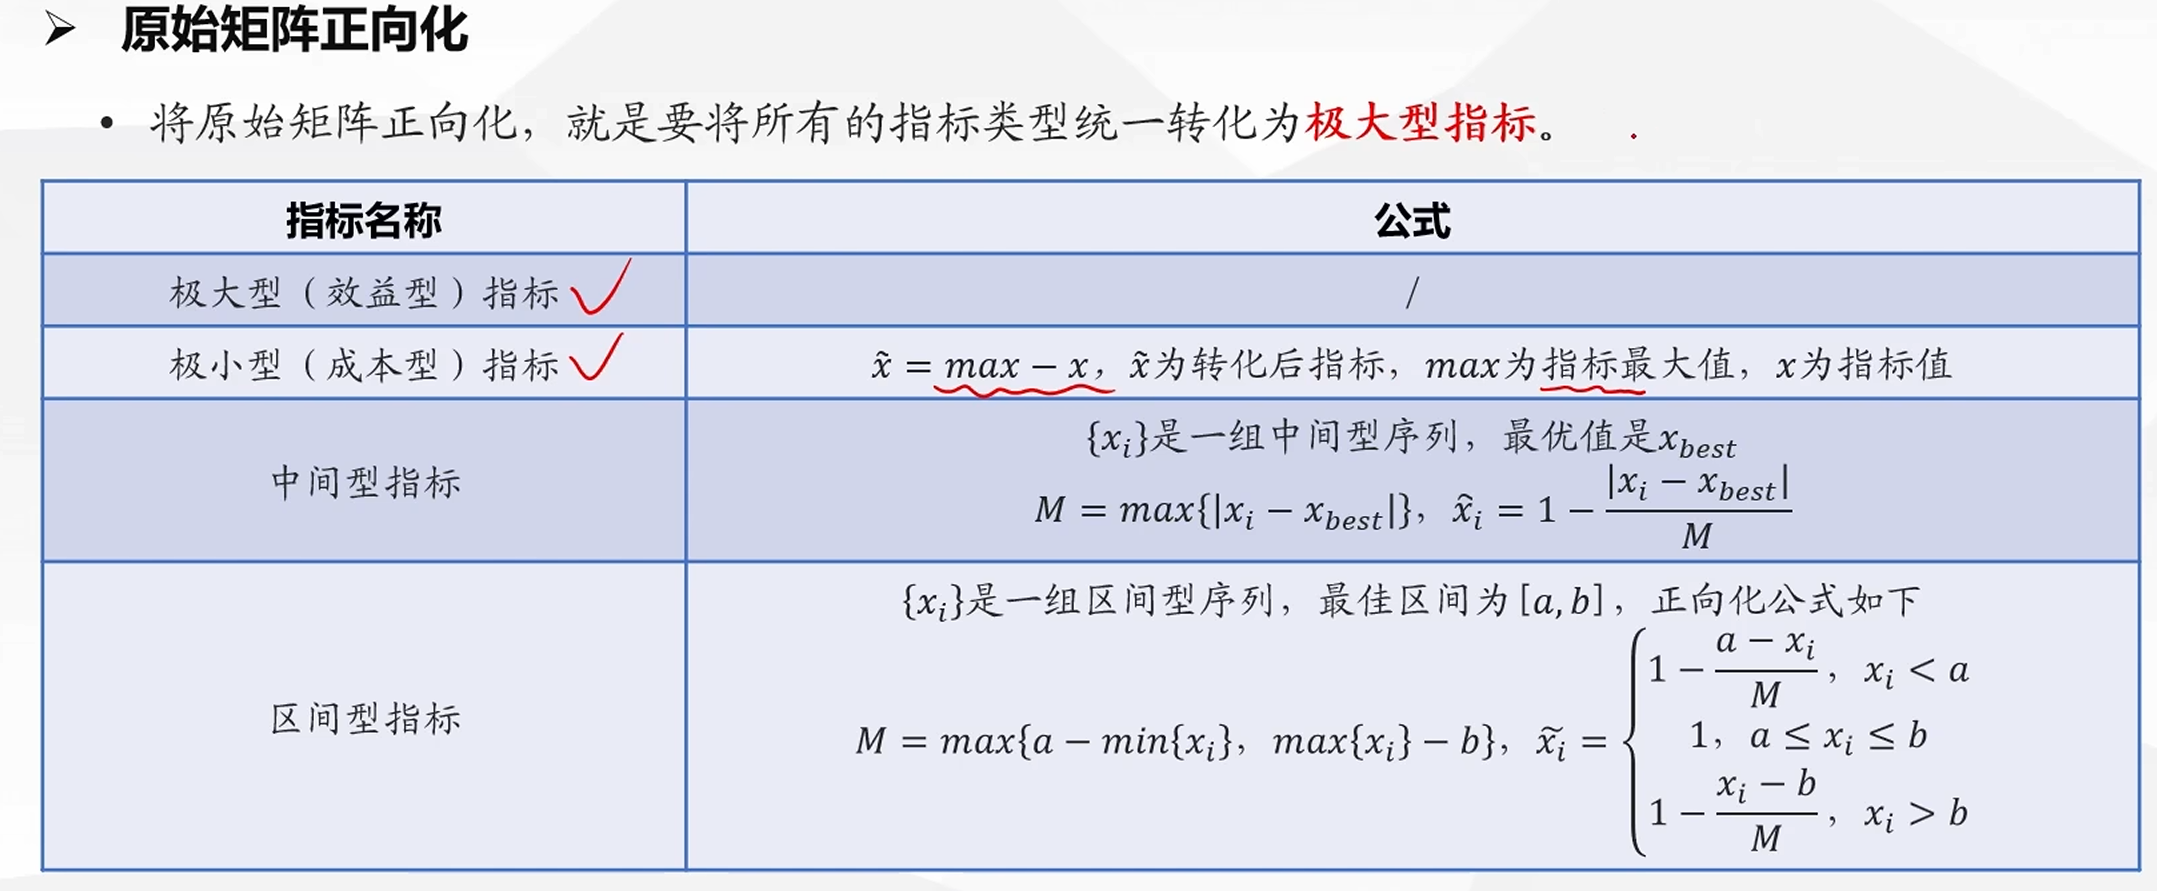

## 正向化代码


In [2]:
import numpy as np
# 极小型
def minTomax(maxx,x):
    x = list(x)
    ans = [[(maxx-e)] for e in x ]
    return np.array(ans)

#中间型
def midTomax(bestx,x):
    x = list(x)
    h = [abs(e-bestx) for e in x]
    M = max(h)
    if M == 0:
        M = 1
    ans = [[(1-e/M)]for e in h]
    return np.array(ans)

#区间型
def regTomax(lowx,highx,x):
    x = list(x)
    M = max(lowx-min(x),max(x)-highx)
    if M == 0:
        M = 1
    ans = []
    for i in range(len(x)):
        if x[i]<lowx:
            ans.append([(1-(lowx-x[i])/M)])
        elif x[i]>highx:
            ans.append([(1-(x[i]-highx)/M)])
        else:
            ans.append([1])
    return np.array(ans)

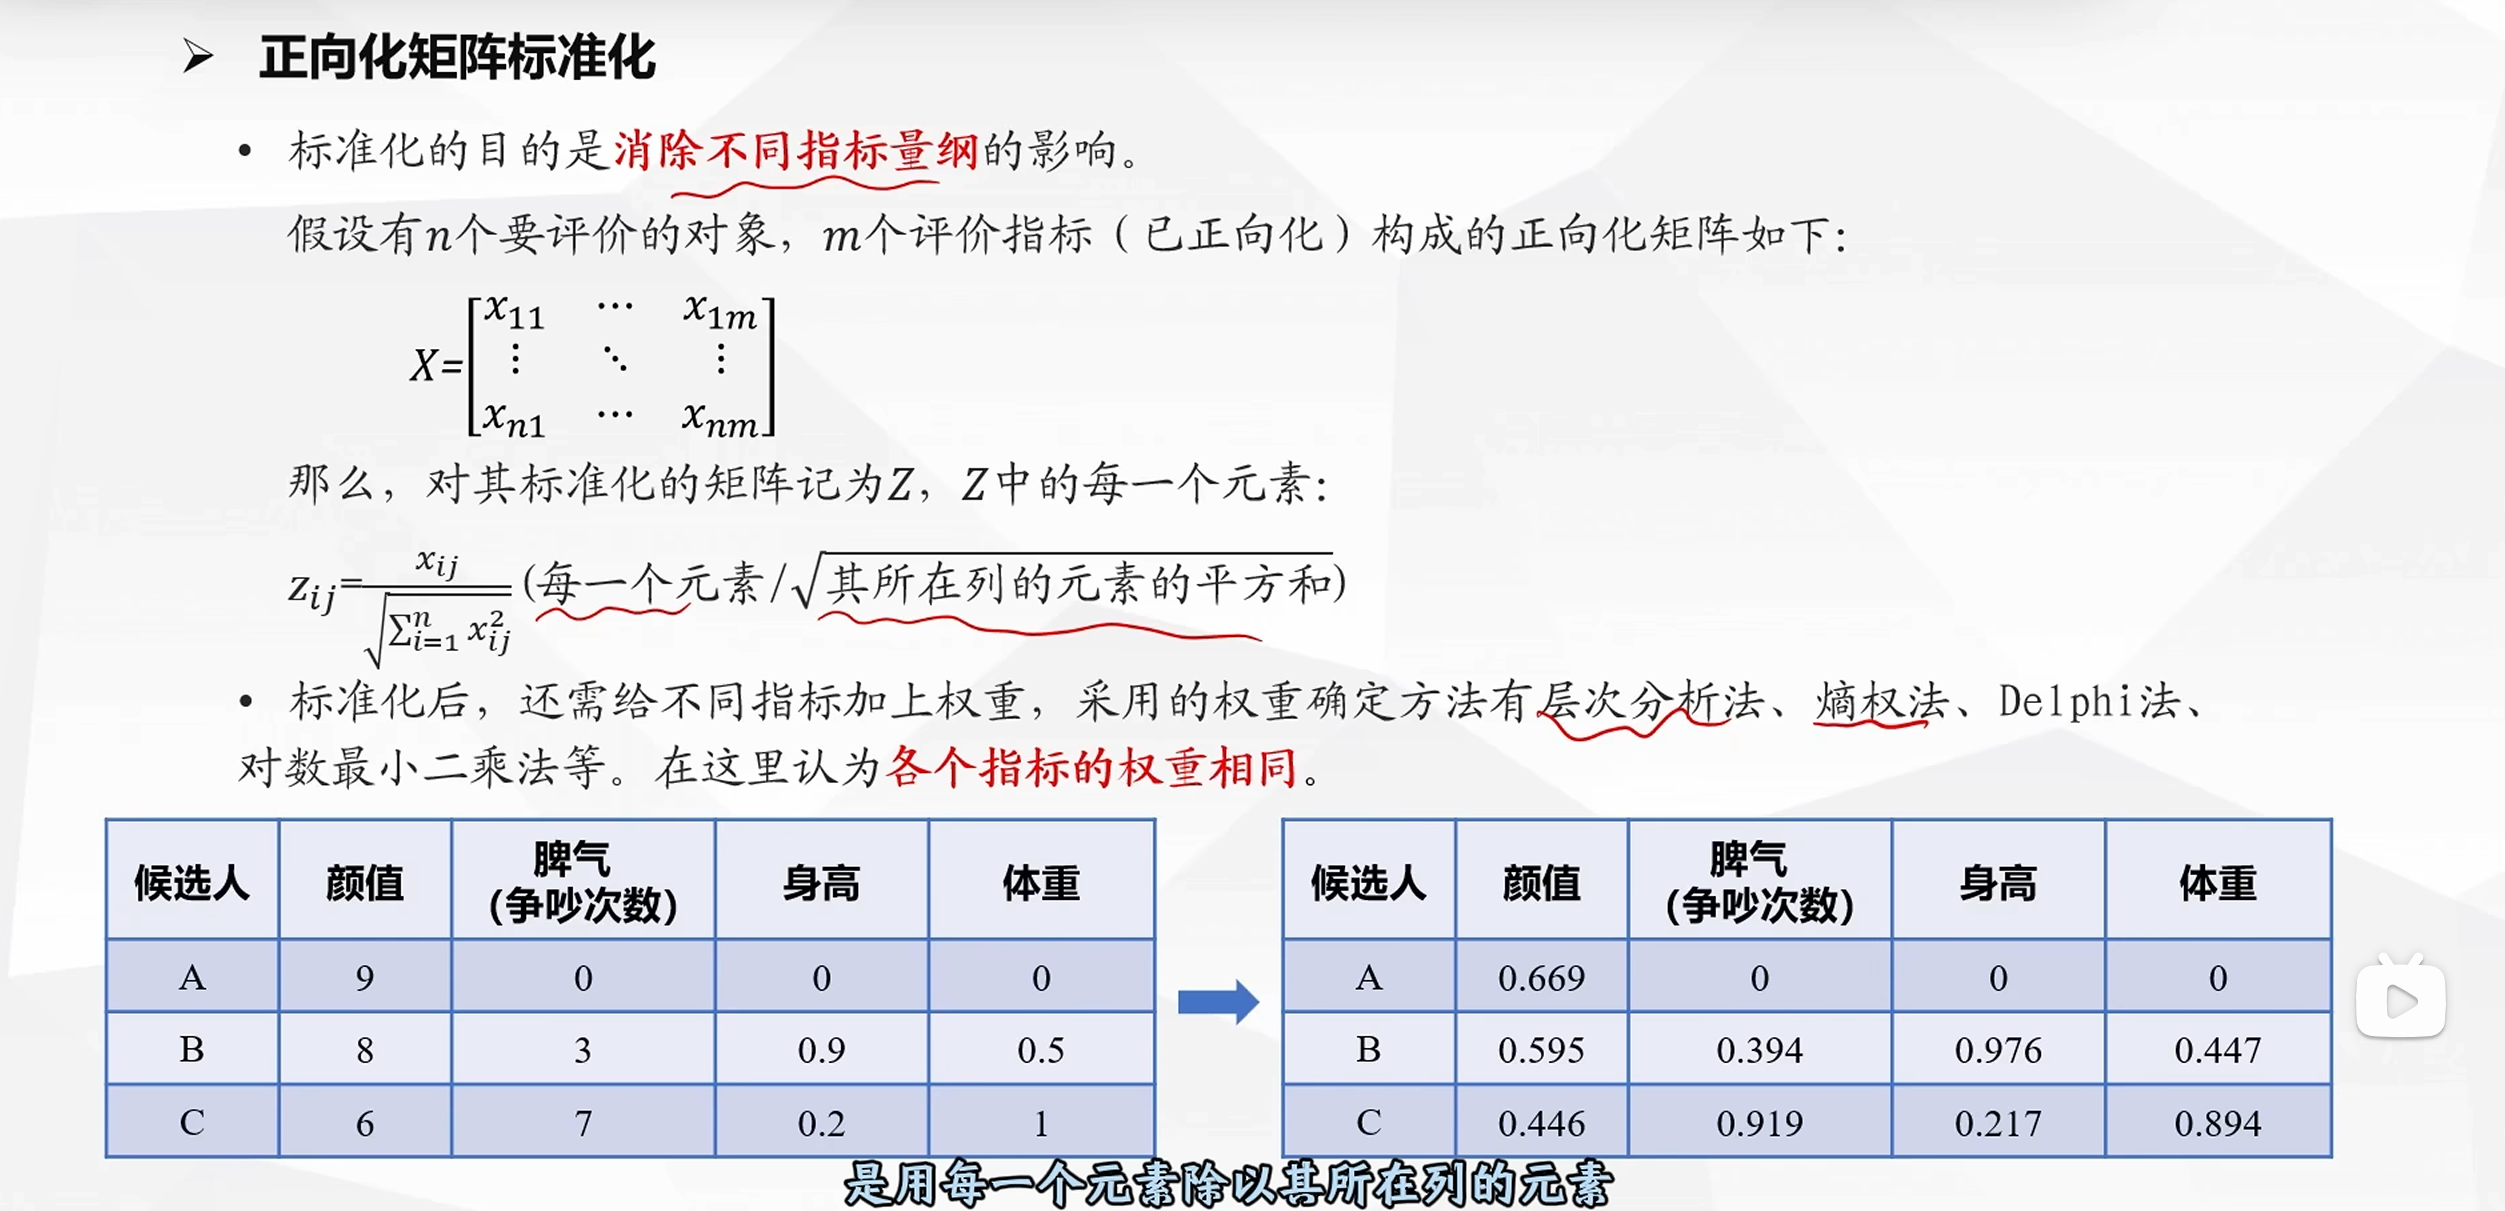

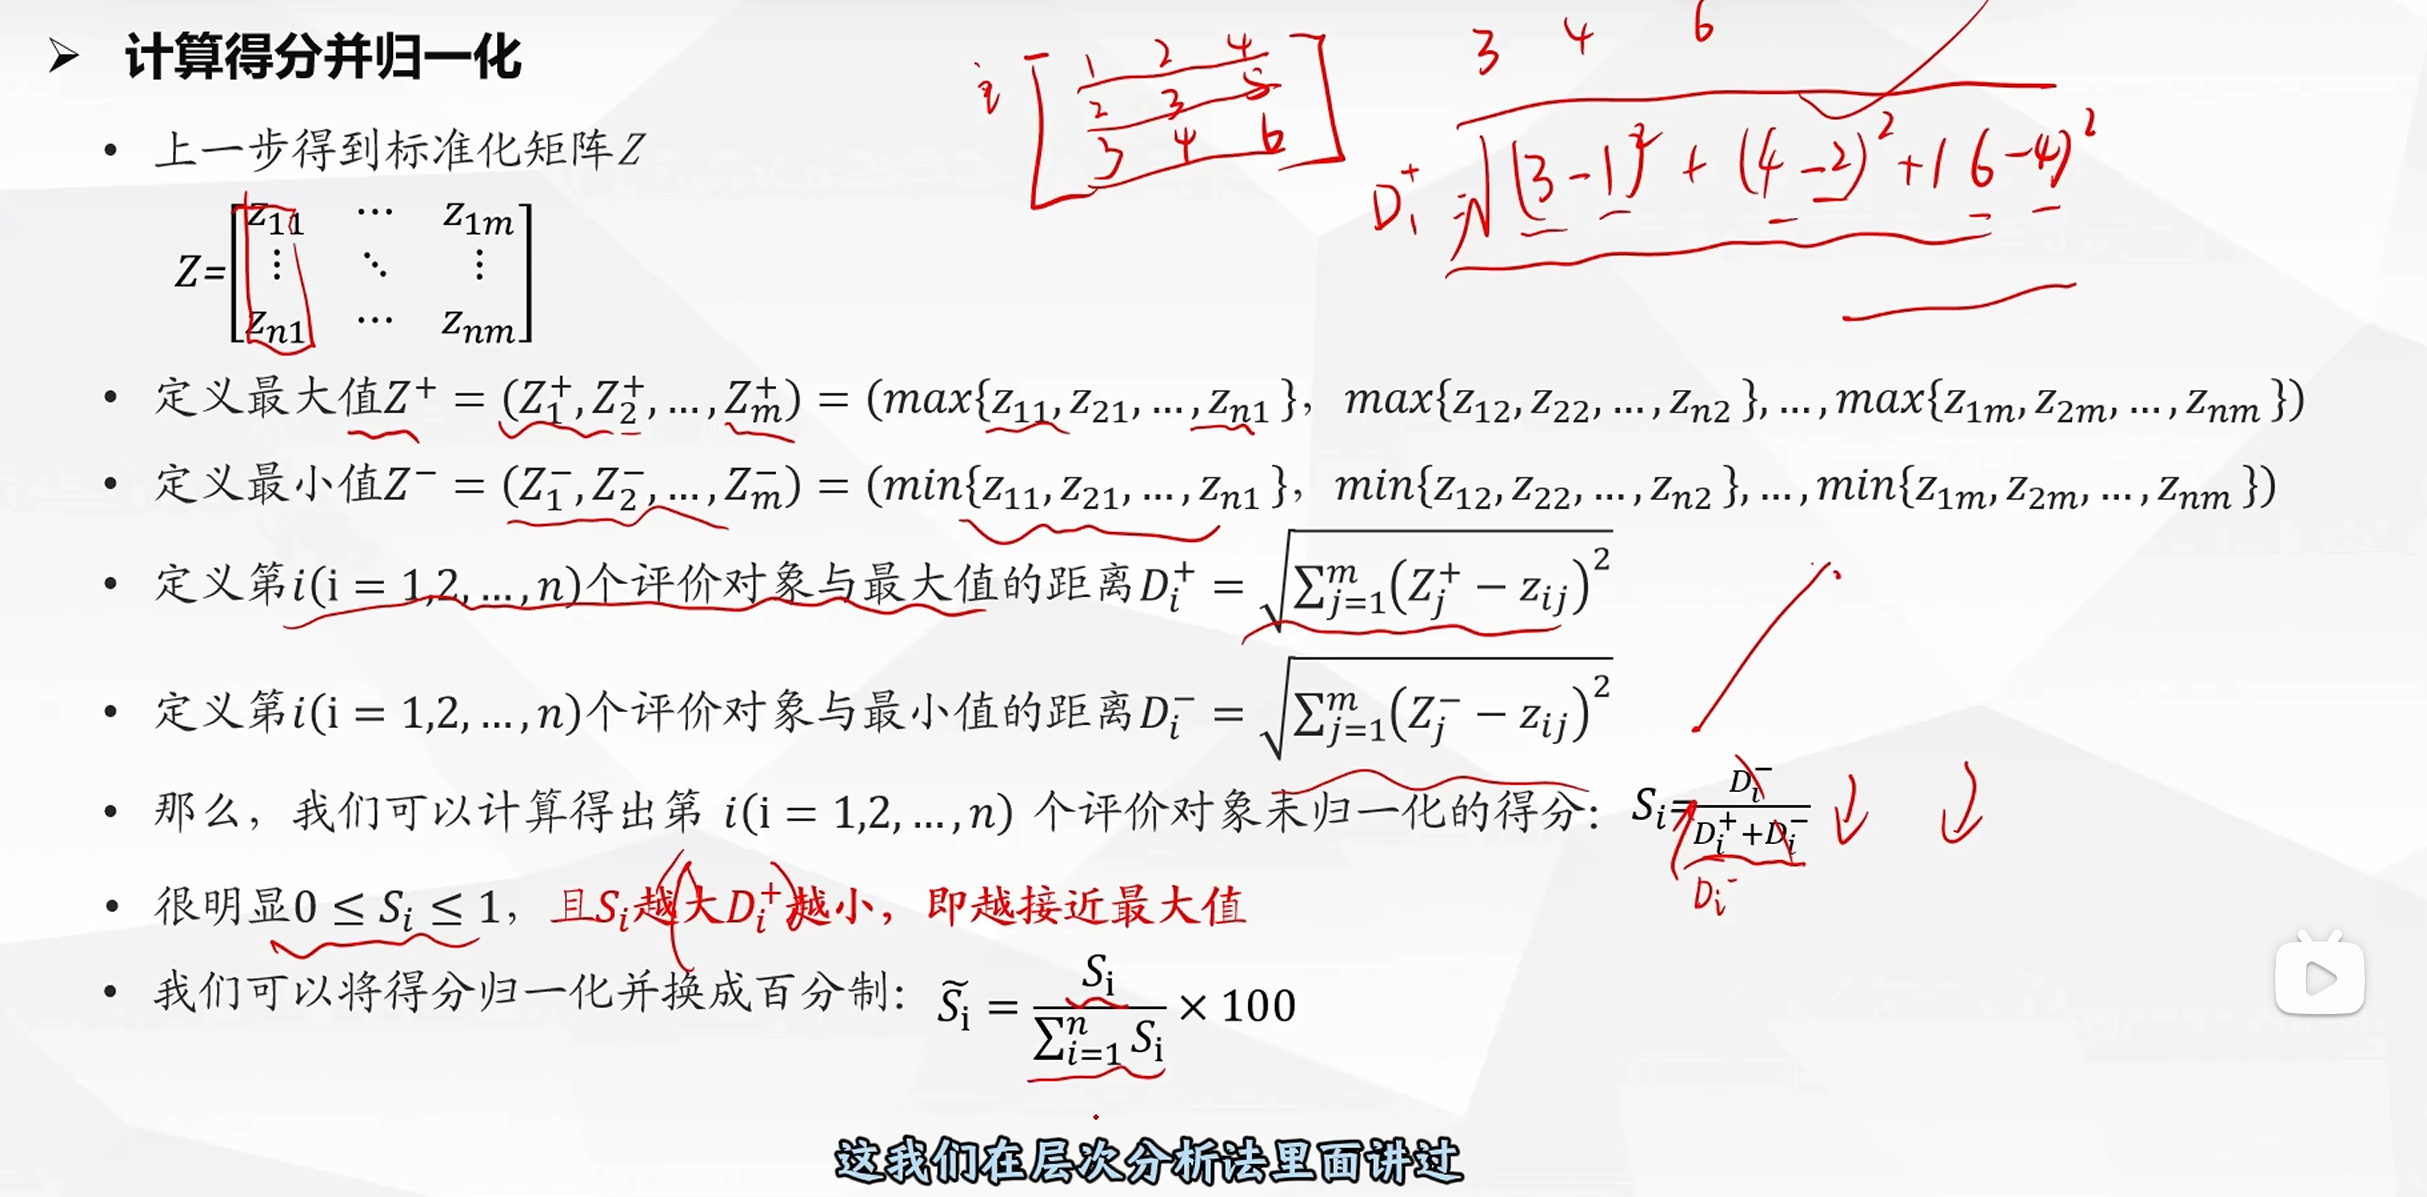

In [4]:
import numpy as np
n = int(input('请输入参评数目：'))
m = int(input('请输入指标数目：'))
kind = input('请输入类型矩阵，1.极大型，2.极小型，3.中间型，4.区间型(每一列是什么类型)').split(" ")
print("请输入矩阵：")
A = np.zeros(shape = (n,m))
for i in range(n):
    A[i] = input().split(" ")
    A[i] = list(map(float,A[i])) #将字符串序列转换成浮点数序列
print(f"输入矩阵为{A}")

X = np.zeros(shape=(n,1))
for i in range(m):
    if kind[i]=="1":
        v = np.array(A[:,i])
    elif kind[i]=="2":
        maxA = max(A[:,i])
        v = minTomax(maxA,A[:,i])
    elif kind[i]=="3":
        bestA = eval(input("中间型，请输入最佳值: "))
        v = midTomax(bestA,A[:,i])
    elif kind[i]=="4":
        print("区间型，请输入区间下界: ")
        lowA = eval(input())
        print("区间型，请输入区间上界: ")
        highA = eval(input())
        v = regTomax(lowA,highA,A[:,i])
    if i == 0:
        X = v.reshape(-1,1)
    else:
        X = np.hstack((X,v.reshape(-1,1)))
print(f"统一指标后矩阵为: \n{X}")

X = X.astype('float')
for j in range(m):
    X[:,j] = X [:,j]/np.sqrt(sum(X[:,j]**2))
print(f'标准化后矩阵: \n{X}')

x_max = np.max(X,axis=0)
x_min = np.min(X,axis=0)
d_z = np.sqrt(np.sum(np.square((X - np.tile(x_max,(n,1)))),axis=1))
d_f = np.sqrt(np.sum(np.square((X - np.tile(x_min, (n,1)))),axis=1))
print(f"每个指标最大值{x_max}")
print(f"每个指标最小值{x_min}")
print(d_z)
print(d_f)
s = d_f/(d_z+d_f)
Score = 100*s/sum(s)
for i in range(len(Score)):
    print(f"第{i+1}个标准化后百分制得分为：{Score[i]}")

请输入参评数目：3
请输入指标数目：4
请输入类型矩阵，1.极大型，2.极小型，3.中间型，4.区间型(每一列是什么类型)1 2 3 4
请输入矩阵：
9 10 175 120
8 7 164 80
6 3 157 90
输入矩阵为[[  9.  10. 175. 120.]
 [  8.   7. 164.  80.]
 [  6.   3. 157.  90.]]
中间型，请输入最佳值: 165
区间型，请输入区间下界: 
90
区间型，请输入区间上界: 
100
统一指标后矩阵为: 
[[9.  0.  0.  0. ]
 [8.  3.  0.9 0.5]
 [6.  7.  0.2 1. ]]
标准化后矩阵: 
[[0.66896473 0.         0.         0.        ]
 [0.59463532 0.3939193  0.97618706 0.4472136 ]
 [0.44597649 0.91914503 0.21693046 0.89442719]]
每个指标最大值[0.66896473 0.91914503 0.97618706 0.89442719]
每个指标最小值[0.44597649 0.         0.         0.        ]
[1.61175952 0.69382053 0.79132442]
[0.22298824 1.15334862 1.30072534]
第1个标准化后百分制得分为：8.886366735657832
第2个标准化后百分制得分为：45.653341055701134
第3个标准化后百分制得分为：45.46029220864103
